<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/02_pytorch_classification_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02. PyTorch Classification Exercises

The following is a template for 02. PyTorch Classification exercises.

It's only starter code and it's your job to fill in the blanks.

Because of the flexibility of PyTorch, there may be more than one way to answer the question.

Don't worry about trying to be *right* just try writing code that suffices the question.

## Resources
* These exercises are based on [notebook 02 of the learn PyTorch course](https://www.learnpytorch.io/02_pytorch_classification/).
* You can see one form of [solutions on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions) (but try the exercises below yourself first!).

In [1]:
# Import torch
import torch
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
# Setup random seed
RANDOM_SEED = 42

## 1. Make a binary classification dataset with Scikit-Learn's [`make_moons()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) function.
  * For consistency, the dataset should have 1000 samples and a `random_state=42`.
  * Turn the data into PyTorch tensors. 
  * Split the data into training and test sets using `train_test_split` with 80% training and 20% testing.

In [2]:
# Create a dataset with Scikit-Learn's make_moons()
from sklearn.datasets import make_moons
NUM_SAMPLES = 1000
RANDOM_SEED = 42
X, y = make_moons(n_samples=NUM_SAMPLES, random_state=RANDOM_SEED, 
                  noise=0.07)

In [3]:
# Turn data into a DataFrame
import pandas as pd
data_df = pd.DataFrame({"X0":X[:, 0],
             "X1":X[:, 1],
             "y": y})
data_df.head()

,X0,X1,y
0,-0.033411,0.421391,1
1,0.998827,-0.442890,1
2,0.889592,-0.327843,1
3,0.341958,-0.417690,1
4,-0.838531,0.532375,0


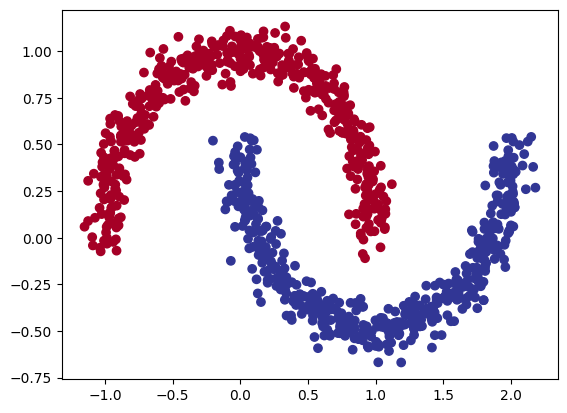

In [4]:
# Visualize the data on a scatter plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1], 
            c=y , cmap= plt.cm.RdYlBu)

In [5]:
# Split the data into train and test sets (80% train, 20% test)
from sklearn.model_selection import train_test_split 

X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

x_moon_train,x_moon_test,y_moon_train,y_moon_test=train_test_split(
    X, y, test_size=0.8, 
    random_state=RANDOM_SEED, stratify=y)     

## 2. Build a model by subclassing `nn.Module` that incorporates non-linear activation functions and is capable of fitting the data you created in 1.
  * Feel free to use any combination of PyTorch layers (linear and non-linear) you want.

In [6]:
import torch
from torch import nn

# Inherit from nn.Module to make a model capable of fitting the mooon data
class MoonModelV0(nn.Module):
    ## Your code here ##
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(in_features=2, out_features=5)
        self.relu1 = nn.ReLU()
        self.layer2 = nn.Linear(in_features=5, out_features=5)
        self.relu2 = nn.ReLU()
        self.layer3 = nn.Linear(in_features=5, out_features=2)
    def forward(self, x):
        ## Your code here ##
        return self.layer3(self.relu2(self.layer2(self.relu1(self.layer1(x)))))

# Instantiate the model
## Your code here ##

model = MoonModelV0()
model

MoonModelV0(
  (layer1): Linear(in_features=2, out_features=5, bias=True)
  (relu1): ReLU()
  (layer2): Linear(in_features=5, out_features=5, bias=True)
  (relu2): ReLU()
  (layer3): Linear(in_features=5, out_features=2, bias=True)
)

In [7]:
model.state_dict()

OrderedDict([('layer1.weight',
              tensor([[ 0.3988,  0.0760],
                      [-0.4068, -0.5213],
                      [ 0.6704,  0.1249],
                      [ 0.2107, -0.4162],
                      [ 0.0990, -0.3139]])),
             ('layer1.bias',
              tensor([ 0.0767, -0.0345,  0.2974,  0.4070, -0.3070])),
             ('layer2.weight',
              tensor([[-0.3124,  0.0908,  0.4336,  0.2232, -0.2799],
                      [-0.1544, -0.1385, -0.3252,  0.3809,  0.4212],
                      [-0.3034,  0.1470,  0.0164, -0.1651,  0.0680],
                      [ 0.1435,  0.1245, -0.0531,  0.1286, -0.3122],
                      [-0.1747,  0.1480, -0.2496, -0.4195,  0.3418]])),
             ('layer2.bias',
              tensor([ 0.3865,  0.4029, -0.3789, -0.2986,  0.3509])),
             ('layer3.weight',
              tensor([[ 0.2508,  0.1771, -0.0296, -0.0704,  0.3227],
                      [-0.3275, -0.2297,  0.0058,  0.3877, -0.1485]])),
       

## 3. Setup a binary classification compatible loss function and optimizer to use when training the model built in 2.

In [8]:
# Setup loss function
loss_fn = nn.BCELoss()
# Setup optimizer to optimize model's parameters
optimizer = torch.optim.Adam(lr=0.001, params=model.parameters())

x_moon_test.requires_grad = True
x_moon_train.requires_grad = True
y_moon_test.requires_grad = True
y_moon_train.requires_grad = True

## 4. Create a training and testing loop to fit the model you created in 2 to the data you created in 1.
  * Do a forward pass of the model to see what's coming out in the form of logits, prediction probabilities and labels.
  * To measure model accuray, you can create your own accuracy function or use the accuracy function in [TorchMetrics](https://torchmetrics.readthedocs.io/en/latest/).
  * Train the model for long enough for it to reach over 96% accuracy.
  * The training loop should output progress every 10 epochs of the model's training and test set loss and accuracy.

In [9]:
# What's coming out of our model?
import warnings
warnings.filterwarnings('ignore')
# Prediction probabilities
print("Pred probs:")
## Your code here ##
print(model(x_moon_train)[:5])
# Prediction labels
print("Pred labels:")
## Your code here ##
print(torch.argmax(model(x_moon_train), dim=1)[:5])

Pred probs:
tensor([[ 0.5121, -0.0552],
        [ 0.5567, -0.1057],
        [ 0.5464, -0.0559],
        [ 0.5985, -0.0780],
        [ 0.5855, -0.1540]], grad_fn=<SliceBackward0>)
Pred labels:
tensor([0, 0, 0, 0, 0])


In [10]:
# Let's calculuate the accuracy using accuracy from TorchMetrics
from torchmetrics import Accuracy

## TODO: Uncomment this code to use the Accuracy function
acc_fn = Accuracy(task="multiclass", num_classes=2).to(device) # send accuracy function to device
acc_fn

acc_fn.to(device)
model.to(device)
loss_fn.to(device)

BCELoss()

In [11]:
## TODO: Uncomment this to set the seed
torch.manual_seed(RANDOM_SEED)

# Setup epochs
epochs = 1000

# Send data to the device
x_moon_train,x_moon_test = x_moon_train.to(device),x_moon_test.to(device)
y_moon_train,y_moon_test = y_moon_train.to(device),y_moon_test.to(device)

# Loop through the data
for epoch in range(epochs):
  ### Training
  model.train()

  # 1. Forward pass (logits output)
  y_probs = model(x_moon_train)
  
  # Turn prediction probabilities into prediction labels
  y_pred = torch.argmax(y_probs, dim=1)
  y_pred = torch.tensor(y_pred, dtype= torch.float32)
  
  # 2. Calculaute the loss
  loss = loss_fn(y_pred, y_moon_train) # loss = compare model raw outputs to desired model outputs

  # Calculate the accuracy
  acc = acc_fn(y_pred, y_moon_train.int()) # the accuracy function needs to compare pred labels (not logits) with actual labels

  # 3. Zero the gradients
  optimizer.zero_grad()

  # 4. Loss backward (perform backpropagation)
  loss.backward()
  
  # 5. Step the optimizer 
  optimizer.step()
  

  ### Testing
  model.eval() 
  with torch.inference_mode():
    # 1. Forward pass (to get the logits)
    y_test_logits = model(x_moon_test)
    # Turn the test logits into prediction labels
    y_test_preds = torch.argmax(y_test_logits, dim=1)
    y_test_preds = torch.tensor(y_test_preds, dtype= torch.float32)

    # 2. Caculate the test loss/acc
    test_loss = loss_fn(y_test_preds, y_moon_test)
    acc_test = acc_fn(y_test_preds, y_moon_test)

  # Print out what's happening every 100 epochs
  if epoch % 100 == 0:
    print(epoch," Training acc :", acc, " Testing acc :", acc_test)
    

0  Training acc : tensor(0.5000, device='cuda:0')  Testing acc : tensor(0.5000, device='cuda:0')
100  Training acc : tensor(0.5000, device='cuda:0')  Testing acc : tensor(0.5000, device='cuda:0')
200  Training acc : tensor(0.5000, device='cuda:0')  Testing acc : tensor(0.5000, device='cuda:0')
300  Training acc : tensor(0.5000, device='cuda:0')  Testing acc : tensor(0.5000, device='cuda:0')
400  Training acc : tensor(0.5000, device='cuda:0')  Testing acc : tensor(0.5000, device='cuda:0')
500  Training acc : tensor(0.5000, device='cuda:0')  Testing acc : tensor(0.5000, device='cuda:0')
600  Training acc : tensor(0.5000, device='cuda:0')  Testing acc : tensor(0.5000, device='cuda:0')
700  Training acc : tensor(0.5000, device='cuda:0')  Testing acc : tensor(0.5000, device='cuda:0')
800  Training acc : tensor(0.5000, device='cuda:0')  Testing acc : tensor(0.5000, device='cuda:0')
900  Training acc : tensor(0.5000, device='cuda:0')  Testing acc : tensor(0.5000, device='cuda:0')
